## Generation-time branch attraction

Taxa with short generation times have longer edge lengths in units of generations, and this means that per unit time a recombination crossover event is less likely to cause a sample from this lineage to trace back to a very different part of the tree (i.e., when recombination falls on this branch it is likely to still trace back to the same topological position). 

Just like Ne this will cause some lineages to exhibit greater variance in their positions than others. However, unlike Ne, generation time is what determines the *spatial* similarity of genealogies. 

We want to show: 

1. variable Ne does not bias MSC w/ true unlinked genealogies even though it affects coalescent variance. 
2. variable g does not bias MSC w/ true unlinked genealogies even though it affects coalescent variance. 
3. variable Ne does not bias the similarity of true neighboring linked genealogies.
4. variable g does bias the similarity of true neighboring linked genealogies.
5. inferred gene trees of concatelesced sequence w/ variable Ne biases towards concatenation tree.
6. inferred gene trees of concatelesced sequence w/ variable g biases towards concatenation tree AND towards generation time attraction.

In [1]:
import toytree
import toyplot, toyplot.svg
import ipcoal
import numpy as np
import ipyrad.analysis as ipa

### Simulation scenario with deep divergences (crown 25Ma)

In [2]:
# get an ultrametric imbalanced tree
tree = toytree.rtree.baltree(16, treeheight=25e6)
tree.draw(ts='p');

<svg class="toyplot-canvas-Canvas" height="265.0px" id="t94342a0fa124464d81478b796c3f2af2" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 265.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 12500000 25000000

In [3]:
# store the alphanumeric order of names on the tree
NAMEORDER = tree.get_tip_labels()

### Species tree in units of generations
To setup a simulation on this tree we need branch lengths to be in units of generations. If we assume that 1 generation = 1 year then nothing has to be done. Here we assume that generations times are 1 for half of the taxa on the tree, but 1 generation = 10 years for several other taxa. The tree below shows that this looks like in terms of the transformed branch lengths. 

In [4]:
# set gentime on nodes
stree = tree.set_node_values(
    feature="g", values={i: 10 for i in (0,1,16,4,5,18,8,9,20,12,13,22)}, default=1,
)

# convert edges to time in units of generations
gtree = tree.set_node_values(
    feature="dist", values={i: j.dist / j.g for (i, j) in stree.idx_dict.items()}
)

In [5]:
gtree.draw(ts='p');#, node_sizes=0, node_labels=False, edge_type='p');

<svg class="toyplot-canvas-Canvas" height="265.0px" id="tfc3dc1f599db4f99b06fb7a9282d2f46" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 265.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 0 12500000 25000000

### Example sequential genealogies

In [6]:
# visualize tree with edge lengths in absolute time
model = ipcoal.Model(gtree, Ne=10e6, seed=12345)
model.sim_trees(4)
toytree.mtree(model.df.genealogy).draw(ts='n', layout='d', height=225, width=900);

<svg class="toyplot-canvas-Canvas" height="225.0px" id="tccce346d69734cb7b8c50e44a977d3d5" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 900.0 225.0" width="900.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> r1 r0 r2 r6 r5 r7 r4 r10 r8 r9 r3 r14 r13 r15 r11 r12 r5 r4 r3 r2 r0 r6 r11 r10 r8 r13 r15 r14 r9 r7 r1 r12 r15 r13 r10 r8 r0 r7 r6 r3 r2 r1 r5 r4 r11 r9 r14 r12 r7 r6 r5 r15 r9 r14 r12 r13 r1 r3 r2 r0 r11 r10 r8 r4

### Are branches attracted by generation times on true genealogies?

In [7]:
# simulate 2K unlinked genealogies
model.sim_trees(2000)
trees = toytree.mtree(model.df.genealogy)

In [8]:
# convert simulated genealogies branch lengths from generations to E(seq.div.)
for tree in trees.treelist:
    for node in tree.treenode.traverse():
        node.dist = node.dist * 1e-8

In [9]:
def topo_dist(t1):
    """
    Return alphanumeric name ordered array of topo dist between all nodes on a tree
    """
    # array of tips in alphanumeric ordr
    arr = np.zeros((len(t1), len(t1)), dtype=float)
    
    # iterate to compare all tips to tips
    labels = NAMEORDER  # sorted(t1.get_tip_labels())
    for idx1 in range(len(t1)):
        for idx2 in range(len(t1)):
            if idx1 != idx2:
                
                # get distance between tips on every tree
                node1 = t1.idx_dict[idx1]
                node2 = t1.idx_dict[idx2]
                dist = node1.get_distance(node2, topology_only=True)
                nidx1 = labels.index(node1.name)
                nidx2 = labels.index(node2.name)
                arr[nidx1, nidx2] = dist
    return arr

In [10]:
def sequential_dist(trees):
    """
    Return array of topo dists between nodes on sequential trees in ordered input.
    """
    arrs = []
    dists = None
    for tree in trees:
        if dists is not None:
            diff = abs(dists - topo_dist(tree))
            arrs.append(diff)
        dists = topo_dist(tree)
    return np.array(arrs)

The average distance between some nodes is greater or lesser than others, but only because the variance in position of some nodes is greater than others. The same effect would be seen if Ne was simply greater on some branches than others (TODO: show this side by side). 

In [11]:
def plot_matrix(dat):
    
    # get min and max of the off-diagonal elements
    dat = dat.copy()
    dat[np.diag_indices_from(dat)] = dat.mean()
    cmap = toyplot.color.LinearMap(domain_min=dat.min(), domain_max=dat.max())
    canvas = toyplot.Canvas(320, 300)
    ax1 = canvas.table(rows=dat.shape[0], columns=dat.shape[1], bounds=(50, 250, 50, 250))

    # apply colors to cells but not diagonals
    for ridx in range(dat.shape[0]):
        for cidx in range(dat.shape[1]):
            
            if ridx == cidx:
                ax1.cells.cell[ridx, cidx].style = {'fill': 'grey', 'stroke': 'none'}
            else:
                col = cmap.color(dat[ridx, cidx])
                ax1.cells.cell[ridx, cidx].style = {'fill': col, 'stroke': 'none'}

    # style spacing between grid cells            
    ax1.body.gaps.columns[...] = 1
    ax1.body.gaps.rows[...] = 1

    # add a colorbar to canvas
    numberline = canvas.numberline(270, 250, 270, 50)
    numberline.colormap(cmap, style={"stroke-width":5})
    numberline.axis.ticks.locator = toyplot.locator.Extended(only_inside=True)
    return canvas, ax1

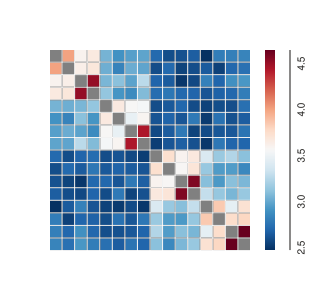

In [12]:
# plot the avg. difference between sequential trees
dat = sequential_dist(trees.treelist).var(axis=0)
c, t = plot_matrix(dat);
toyplot.svg.render(c, "../figures/fig-1-vg-unlinked-var.svg")
c

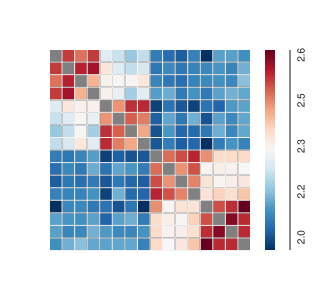

In [13]:
# plot the avg. difference between sequential trees
dat = sequential_dist(trees.treelist).mean(axis=0)
c, t = plot_matrix(dat);
toyplot.svg.render(c, "../figures/fig-1-vg-unlinked-mean.svg")
c

### Multi-species coalescent is not affected with True genealogies
With unlinked genealogies the greater variance in position of taxa with long generations times is no different than the greater variance caused by differences in Ne. In other words, generation time can be ignored since it the Ne parameter can effectively suck up any variance explained by differences in generation time.

In [14]:
# # infer a species tree
# ast = ipa.astral([i.write() for i in trees])
# ast.run()

In [15]:
# assume julia & snaq are already installed.
# needs to parse the returned network into major tree + edge tuples
# snaq = ipa.snaq()

In [16]:
# toytree.tree(ast.tree).root(regex='r[0-8]').draw(layout='d');

### LINKED GENEALOGIES

In [17]:
# simulate 2K unlinked genealogies
model.sim_trees(nloci=1, nsites=50000)
trees = toytree.mtree(model.df.genealogy)
print(len(trees))

11117


In [18]:
# convert simulated genealogies branch lengths from generations to E(seq.div.)
for tree in trees.treelist:
    for node in tree.treenode.traverse():
        node.dist = node.dist * 1e-8

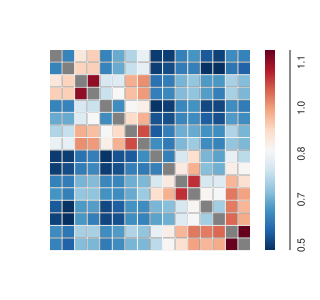

In [19]:
# plot the avg. difference between sequential trees
dat = sequential_dist(trees.treelist).var(axis=0)
c, t = plot_matrix(dat);
toyplot.svg.render(c, "../figures/fig-1-vg-linked-var.svg")
c

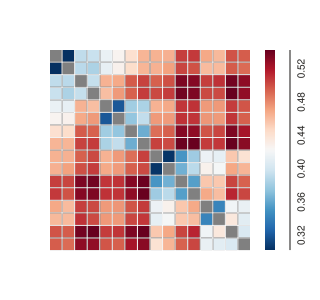

In [20]:
# plot the avg. difference between sequential trees
dat = sequential_dist(trees.treelist).mean(axis=0)
c, t = plot_matrix(dat);
toyplot.svg.render(c, "../figures/fig-1-vg-linked-mean.svg")
c

### Plot the rate of change spatially among nodes on the tree
The average delta-genetic-distance between nodes in sequential trees...

In [21]:
#tree.treenode.get_distance()

### Simulate sequence data on genealogies (TODO: HKY model)

In [27]:
# simulate loci that are each 3000bp in length
model.sim_loci(nloci=1000, nsites=3e3)
model.write_loci_to_hdf5(name="var-g", outdir="db")

wrote 1000 loci to /home/deren/Documents/gentime-attraction/notebooks/db/var-g.seqs.hdf5
